## CoE 197M Assignment 1
#### Edward Vincent M. Duero 
#### 2015-11198

Importing important modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Functions for finding the interweaved $\sin(\cdot)$ and $\cos(\cdot)$ functions

In [2]:
# Code from https://www.tensorflow.org/tutorials/text/transformer
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
  pos_encoding = angle_rads[np.newaxis, ...]
    
  return pos_encoding

Function for plotting an array

In [3]:
def plot_array(np_array, title):
    plt.figure(figsize=(8,4))
    plt.pcolormesh(np_array[0], cmap='viridis')
    plt.xlabel('Embedding Dimensions')
    plt.xlim((0, dimensions))
    plt.ylim((tokens,0))
    plt.ylabel('Token Position')
    plt.title(title)
    plt.colorbar()
    plt.show()

Create a 16 $\times$ 16-dim position encoding and plotting it

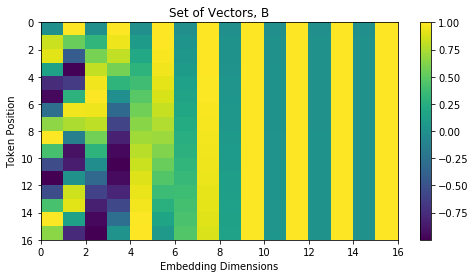

In [4]:
tokens = 16
dimensions = 16

B = positional_encoding(tokens, dimensions)
plot_array(B, "Set of Vectors, B")

Let us assume that the **B** is a set of basis vectors and the vectors are linearly independent. We check if this set of basis vectors is orthogonal and/or orthonormal. We can check if a set of vectors is orthogonal if the dot product of the elements with each other is zero. To check if it is orthonormal, we check if all the dot product of each vector with itself is 1. The functions below performs these tasks.

In [5]:
def check_orthogonal(np_array):
    x, y, z = np_array.shape
    
    print("Orthogonal Check:")
    for i in range(0, y):
        print(i)
        for j in range(0, y):
            comparison = np_array[0][:, i] == np_array[0][:, j]
            if(not comparison.all()):
                print(j, ": ", np.dot(np_array[0][:, i], np_array[0][:, j]))
                    
def check_normal(np_array):
    x, y, z = np_array.shape
    dot_prods = []
    
    print("Orthonormal Check:")
    for i in range(0, y):
        dot_prods.append(np.dot(np_array[0][:, i], np_array[0][:, i]))
    print(dot_prods)

In [6]:
check_orthogonal(B)

Orthogonal Check:
0
1 :  -0.11124568128212842
2 :  -1.0963285440770532
3 :  1.3066000454116649
4 :  1.0305573366428524
5 :  0.9268142938568155
6 :  0.4863520146604353
7 :  1.814468408976698
8 :  0.1594987075876505
9 :  1.9233462675749657
10 :  0.050620282043887244
11 :  1.9344511484872398
12 :  0.016013312145996897
13 :  1.9355638241461617
14 :  0.005064036519691813
15 :  1.9356751136044146
1
0 :  -0.11124568128212842
2 :  -0.6752282638206619
3 :  0.22102004097724415
4 :  0.10563309520098552
5 :  0.5988831187746493
6 :  0.040954600421390014
7 :  0.7040766474166833
8 :  0.013139296934443045
9 :  0.7142090176515825
10 :  0.0041607846652344585
11 :  0.7152161630640473
12 :  0.0013159376550475306
13 :  0.7153168143056824
14 :  0.0004161417788744702
15 :  0.7153268787944496
2
0 :  -1.0963285440770532
1 :  -0.6752282638206619
3 :  1.5111050382327442
4 :  -0.6855705238136414
5 :  4.560373986832736
6 :  -0.559527341422588
7 :  2.782851487084475
8 :  -0.18899172384483795
9 :  2.5636880282427237

The `check_orthogonal` function shows the dot product of the vector $v_i$ with other vectors. We can observe that the dot products are not equal to 0 which means that **B** is not orthogonal

In [7]:
check_normal(B)

Orthonormal Check:
[7.8700390900630115, 8.129960909936987, 8.046900878042539, 7.953099121957461, 7.645874888815069, 8.354125111184931, 1.1818996294530888, 14.818100370546912, 0.12340697966578812, 15.876593020334212, 0.012394057621283235, 15.987605942378718, 0.0012399405640214451, 15.998760059435979, 0.00012399940562802148, 15.999876000594371]


The `check_normal` function shows the dot product of vector $v_i$ with itself. We can observe that the results of the dot products are not equal to 1 which means that **B** is not orthonormal

The checks above have shown that the vectors in **B** are not orthogonal and orthonormal.
We can make the vectors in **B** orthogonal and orthonormal by using the Gram-Schmidt process. We'll use the function `gs` below to perform this task.

In [8]:
def gs(B):
    x, y, z = B.shape
    B_orthonormal = np.empty((y, z))
    B_orthonormal[:, 0] = B[0][:, 0] / np.sqrt(sum(B[0][:, 0]**2))
    
    for i in range(1, y):
        v = B[0][:, i]
        u = B[0][:, 0:i]
        
        v_proj_u = (u @ np.linalg.inv(u.T @ u) @ u.T) @ v
        u2 = v - v_proj_u
        B_orthonormal[:, i] = u2/np.linalg.norm(u2)
    
    return B_orthonormal

Creating a set of orthonormal vectors from **B**:

In [9]:
B_orthonormal = np.array([gs(B)])

Let us check once again if the vectors are not orthogonal and orthonormal

In [10]:
check_orthogonal(B_orthonormal)

Orthogonal Check:
0
1 :  1.0408340855860843e-17
2 :  -2.7755575615628914e-17
3 :  -2.42861286636753e-17
4 :  6.245004513516506e-17
5 :  -2.636779683484747e-16
6 :  1.3891665595622271e-14
7 :  -1.662361914789301e-11
8 :  -2.519250799939976e-05
9 :  -0.05280956562263178
10 :  0.47381196118839763
11 :  -0.10016968977207982
12 :  -0.03905167495475473
13 :  -0.4290404383156416
14 :  -0.37212214465936033
15 :  0.18301832569941623
1
0 :  1.0408340855860843e-17
2 :  5.551115123125783e-17
3 :  0.0
4 :  -5.551115123125783e-17
5 :  6.245004513516506e-17
6 :  -2.8144153674247718e-14
7 :  5.7281041021539636e-11
8 :  -4.370255367203146e-06
9 :  0.09147456120011319
10 :  0.07627311517053355
11 :  0.2790072483141629
12 :  -0.3225266041801475
13 :  -0.15019304344097736
14 :  -0.2733209492431663
15 :  -0.005253991817824946
2
0 :  -2.7755575615628914e-17
1 :  5.551115123125783e-17
3 :  -2.7755575615628914e-17
4 :  3.469446951953614e-17
5 :  -2.0816681711721685e-16
6 :  6.360190152321366e-14
7 :  5.919157

It seems that not all vectors are orthogonal with other vectors. Perhaps the reason is that this algorithm is numerically unstable (https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process) which causes errors and thus, removes the orthogonality of the vectors. But even so, we can see orthogonality at some vectors.

In [11]:
check_normal(B_orthonormal)

Orthonormal Check:
[0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0000000000000002, 1.0, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 1.0, 1.0, 0.9999999999999998]


Now for checking for orthonormal, we can see that the new set of basis vectors is indeed normalized.

The checks have now shown that the vectors are now indeed (quite) orthogonal and orthonormal. The plot of the old vectors and the new vectors are shown below.

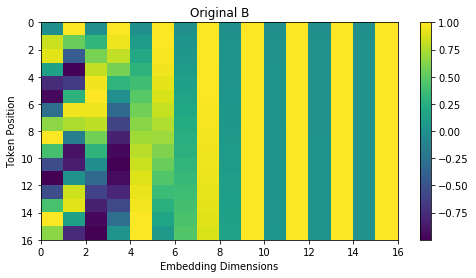

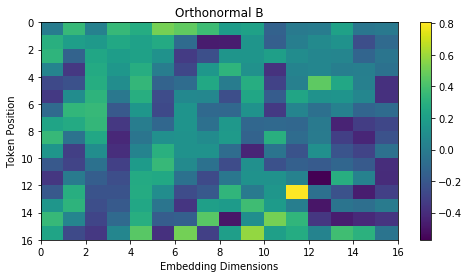

In [12]:
plot_array(B, "Original B")
plot_array(B_orthonormal, "Orthonormal B")